In [4]:
%cd ../corner_detector/

f:\CV_Project\src\modules\corner_detector


In [15]:
from detector_v2 import CornerDetector
import cv2
import matplotlib.pyplot as plt

In [17]:
detector = CornerDetector('./models/corner_detector_v2.1.pt')
detector.device_info()

Is GPU available?: True
GPU count: 1
Device name: NVIDIA GeForce GTX 1070


In [20]:
%cd ../fields_recognition/

f:\CV_Project\src\modules\fields_recognition


In [21]:
IMG_PATH = 'IMG_UPLOAD_20240301_084354.jpg'

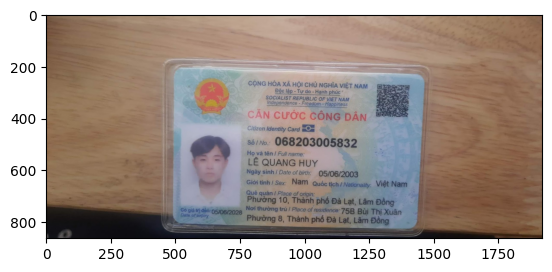

In [22]:
img = cv2.imread(IMG_PATH)
plt.imshow(img[:,:,::-1])

In [23]:
results = detector.predict(IMG_PATH)

In [24]:
for result in results:
    print(result.boxes) 

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 2., 0., 1.], device='cuda:0')
conf: tensor([0.6618, 0.6088, 0.5981, 0.5417], device='cuda:0')
data: tensor([[1.4216e+03, 2.0230e+02, 1.4969e+03, 2.7635e+02, 6.6183e-01, 3.0000e+00],
        [4.6479e+02, 1.8356e+02, 5.3646e+02, 2.5393e+02, 6.0884e-01, 2.0000e+00],
        [4.6975e+02, 7.6703e+02, 5.2942e+02, 8.2663e+02, 5.9806e-01, 0.0000e+00],
        [1.3944e+03, 7.8392e+02, 1.4684e+03, 8.5881e+02, 5.4174e-01, 1.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (864, 1920)
shape: torch.Size([4, 6])
xywh: tensor([[1459.2618,  239.3242,   75.3552,   74.0479],
        [ 500.6246,  218.7437,   71.6731,   70.3649],
        [ 499.5818,  796.8306,   59.6719,   59.5999],
        [1431.4067,  821.3638,   74.0621,   74.8965]], device='cuda:0')
xywhn: tensor([[0.7600, 0.2770, 0.0392, 0.0857],
        [0.2607, 0.2532, 0.0373, 0.0814],
        [0.2602, 0.9223, 0.0311, 0.0690],
        [0.7455, 0.9507, 0.0386

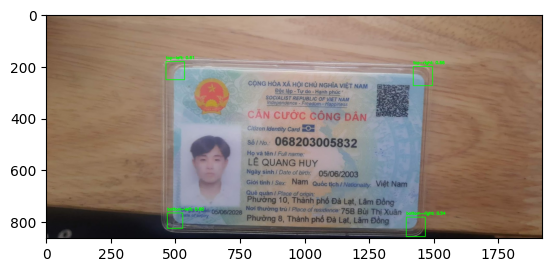

In [25]:
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Lấy toạ độ (x1, y1, x2, y2)
        confidence = box.conf[0].item()  # Lấy độ chính xác
        class_id = int(box.cls[0])  # Lấy ID của class
        label = f"{detector.get_model().names[class_id]}: {confidence:.2f}"  # Tạo label

        # Vẽ bounding box lên ảnh
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Màu xanh lá, độ dày 2px
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.imshow(img[:,:,::-1])